
Object Detection From Saved Model (TensorFlow 2)
=====================================


In [1]:
import os
import time
import tensorflow as tf
print (tf.__version__)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2.5.0


In [12]:
IMAGE_PATHS = [#'object_detection\\test_images\\s.jpg',
               #'object_detection\\test_images\\image2.jpg',
              #'object_detection\\test_images\\image3.jpg',
              'object_detection\\test_images\\image4.jpg',#'object_detection\\test_images\\sa.jpg' 
]

In [4]:
IMAGE_PATHS

['object_detection\\test_images\\image4.jpg']

In [2]:
PATH_TO_LABELS='object_detection\\data\\mscoco_label_map.pbtxt'

In [3]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils


In [4]:
PATH_TO_SAVED_MODEL='object_detection\\models\\ssd_mobilenet_v2_coco_2018_03_29\\saved_model'

In [5]:
print('Loading model...', end='')
start_time = time.time()
print (start_time)

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
detect_fn = detect_fn.signatures['serving_default']

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...1664664558.5871928
Done! Took 8.720136165618896 seconds


Load label map data (for plotting)




In [6]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)

In [7]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    
    return np.array(Image.open(path))

Running inference for object_detection\test_images\image4.jpg...
Done



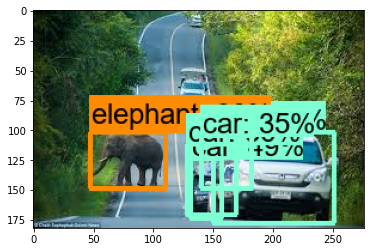

In [13]:

for image_path in IMAGE_PATHS:

    print(f'Running inference for {image_path}...')
    image_np=load_image_into_numpy_array(image_path)

    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np,detections['detection_boxes'],detections['detection_classes'], detections['detection_scores'],
            category_index,use_normalized_coordinates=True,
            max_boxes_to_draw=200,min_score_thresh=.30,agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np)
    print('Done\n' )
plt.show()


In [13]:
os.listdir()

['.ipynb_checkpoints',
 'a3c_blogpost',
 'lstm_object_detection',
 'marco',
 'nst_blogpost',
 'object_detection',
 'Object_detection_saved_model_OK-YT.ipynb',
 'object_detection_saved_model_OK.ipynb',
 'pcl_rl',
 'README.md',
 'rebar',
 'sequence_projection',
 'setup.py',
 'slim',
 'vid2depth']

Running inference for object_detection\test_images\image1.jpg...
dict_keys(['num_detections', 'detection_scores', 'detection_boxes', 'detection_classes'])
Number of Objects in the image =  6
Number of Objects in the image =  6
dict_items([('detection_scores', array([0.98334026, 0.8549994 , 0.8031411 , 0.5935974 , 0.45167255,
       0.44526973], dtype=float32)), ('detection_boxes', array([[0.09463361, 0.37385446, 0.93273234, 0.98162895],
       [0.01381671, 0.01219404, 0.8635445 , 0.3209633 ],
       [0.0110043 , 0.2864534 , 0.72064817, 0.66604316],
       [0.        , 0.33403033, 0.51128376, 0.673678  ],
       [0.04323816, 0.26358074, 0.8977877 , 0.77660197],
       [0.00451432, 0.36288393, 0.33968425, 0.6954466 ]], dtype=float32)), ('detection_classes', array([18., 18.,  1.,  1.,  1.,  1.], dtype=float32)), ('num_detections', 6)])
dict_keys(['detection_scores', 'detection_boxes', 'detection_classes', 'num_detections'])
Classes in the image are :  [18. 18.  1.  1.  1.  1.]
Done

Runni

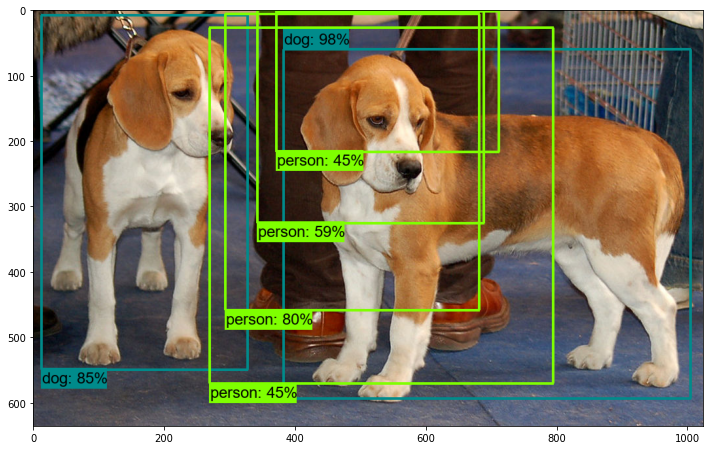

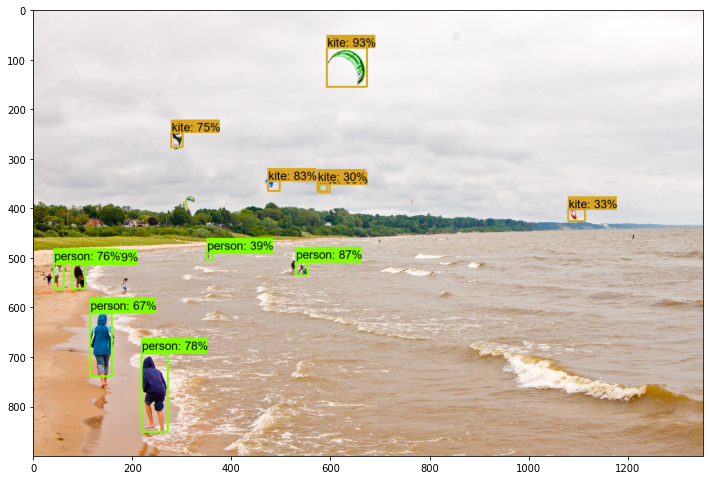

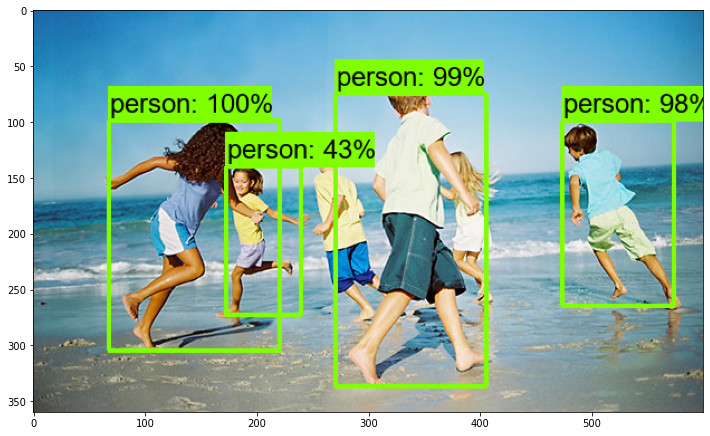

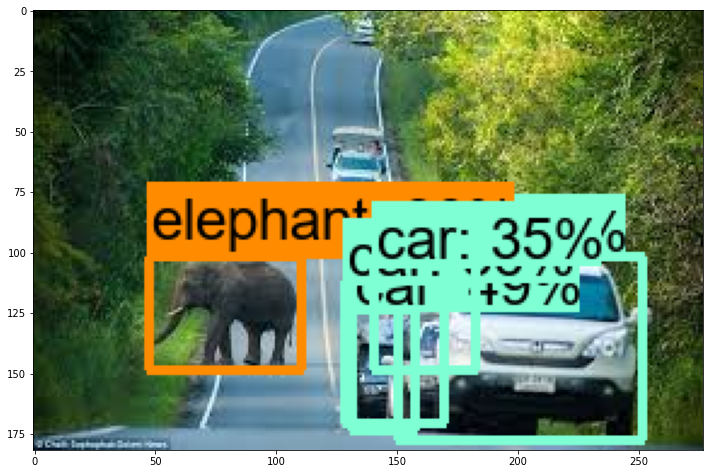

In [14]:

for image_path in IMAGE_PATHS:
    print(f'Running inference for {image_path}...')
    image_np = load_image_into_numpy_array(image_path)

    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
  
    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    print (detections.keys())
    
    num_detections = int(detections.pop('num_detections'))
    print ("Number of Objects in the image = ",num_detections)
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    
    detections['num_detections'] = num_detections
    print ("Number of Objects in the image = ",num_detections)
    print (detections.items())
    print (detections.keys())
    print ("Classes in the image are : " ,detections['detection_classes'])
    
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    #image_np_with_detections = image_np.copy()
    #print (image_np_with_detections)
    
    
    ### VISUALIZATION ON THE IMAGE 
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    
    plt.figure(figsize=(12,12))
    plt.imshow(image_np)
    print('Done\n' )
plt.show()

# sphinx_gallery_thumbnail_number = 2